# Challenge 6.1.6. Time Series Analysis

* Plot the time series, along with any logical or necessary differences to get a stationary dataset
* Generate and interpret a PACF for the time series (and/or its differences)
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
* Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

### Source

Civilian Unemployment Rate
https://fred.stlouisfed.org/series/UNRATE

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

In [3]:
data = pd.read_csv('CPIAUCSL.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
data['CPI'] = pd.to_numeric(data.CPIAUCSL, errors='coerce')

# Remove NA's
data.dropna(inplace=True)

In [4]:
data.head()

,DATE,CPIAUCSL,CPI
0,1947-01-01,21.48,21.48
1,1947-02-01,21.62,21.62
2,1947-03-01,22.00,22.00
3,1947-04-01,22.00,22.00
4,1947-05-01,21.95,21.95


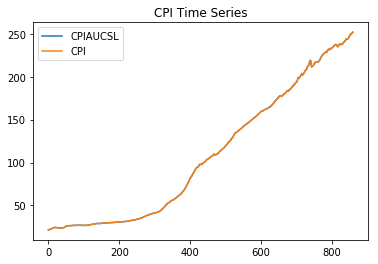

In [5]:
data.plot()
plt.title('CPI Time Series')
plt.show()

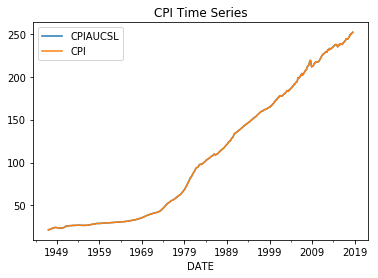

In [6]:
data.index = pd.to_datetime(data.DATE)
data.plot()
plt.title('CPI Time Series')
plt.show()

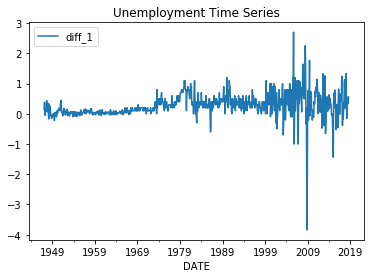

In [7]:
data['diff_1'] = data.CPI - data.CPI.shift()
data.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

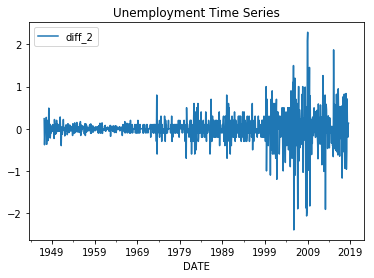

In [8]:
data['diff_2'] = data.diff_1 - data.diff_1.shift()
data.plot(y='diff_2')
plt.title('Unemployment Time Series')
plt.show()

Text(0.5,1,'CPI PACF')

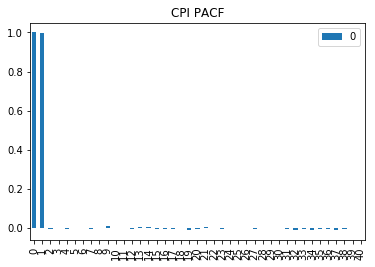

In [12]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(data.CPI))
x_acf.plot(kind='bar')
plt.title("CPI PACF")

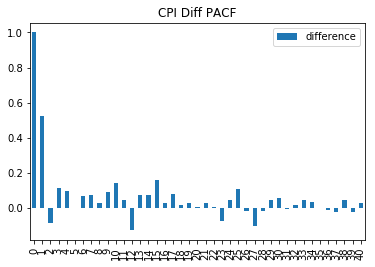

In [13]:
x_acf = pd.DataFrame(pacf(data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("CPI Diff PACF")
plt.legend(['difference'])

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.CPI, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARMA Model Results                              
Dep. Variable:                    CPI   No. Observations:                  860
Model:                     ARMA(1, 0)   Log Likelihood                -585.838
Method:                       css-mle   S.D. of innovations              0.472
Date:                Thu, 27 Sep 2018   AIC                           1177.677
Time:                        14:08:18   BIC                           1191.948
Sample:                    01-01-1947   HQIC                          1183.140
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.1590        nan        nan        nan         nan         nan
ar.L1.CPI      1.0000        nan        nan        nan         nan         nan
                                    Roots           

C:\Users\mhuh22\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mhuh22\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mhuh22\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [18]:
model = ARIMA(data.CPI, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                              ARMA Model Results                              
Dep. Variable:                    CPI   No. Observations:                  860
Model:                     ARMA(0, 1)   Log Likelihood               -4351.391
Method:                       css-mle   S.D. of innovations             37.974
Date:                Thu, 27 Sep 2018   AIC                           8708.783
Time:                        14:09:09   BIC                           8723.053
Sample:                    01-01-1947   HQIC                          8714.246
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.4449      2.588     41.512      0.000     102.372     112.518
ma.L1.CPI      1.0000      0.003    344.075      0.000       0.994       1.006
                                    Roots           

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [19]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.CPI, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  859
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -268.311
Method:                       css-mle   S.D. of innovations              0.331
Date:                Thu, 27 Sep 2018   AIC                            542.623
Time:                        14:09:20   BIC                            556.890
Sample:                    02-01-1947   HQIC                           548.085
                         - 08-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2684      0.024     11.326      0.000       0.222       0.315
ar.L1.D.CPI     0.5246      0.029     18.074      0.000       0.468       0.581
                                    Roots       

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.CPI, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  859
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -280.204
Method:                       css-mle   S.D. of innovations              0.335
Date:                Thu, 27 Sep 2018   AIC                            566.408
Time:                        14:09:32   BIC                            580.675
Sample:                    02-01-1947   HQIC                           571.870
                         - 08-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2682      0.017     15.675      0.000       0.235       0.302
ma.L1.D.CPI     0.4963      0.025     19.545      0.000       0.447       0.546
                                    Roots       

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.CPI, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  859
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -263.546
Method:                       css-mle   S.D. of innovations              0.329
Date:                Thu, 27 Sep 2018   AIC                            535.092
Time:                        14:09:40   BIC                            554.115
Sample:                    02-01-1947   HQIC                           542.375
                         - 08-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2683      0.022     12.429      0.000       0.226       0.311
ar.L1.D.CPI     0.3689      0.060      6.176      0.000       0.252       0.486
ma.L1.D.CPI     0.2154      0.063      3.402    

C:\Users\mhuh22\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
